# AIM5004_HW1

* Implementation of MLP (Multilayer Perceptron). You are going to write codes in any programming languages from the scratch. You can use some libraries, e.g. numpy, but you are NOT allowed to use any deep learning libraries, such as. Tensorflow, Pytorch, and JAX.

* You should submit the codes as Jupyter notebook, .ipynb file or google colab link. All codes should be executable.

- - -

(a) Download MNIST dataset from http://yann.lecun.com/exdb/mnist/ and report the
statistics of the dataset, e.g. how many training (and testing) images, the size of each image, the number of class and the number of images per each classes. Normalize data to [0, 1] if necessary. Show random 3 images per each class.

In [1]:
import os
import gzip
import random
import idx2numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import MinMaxScaler

We got 4 data files
- train-images-idx3-ubyte.gz
- train-labels-idx1-ubyte.gz
- t10k-images-idx3-ubyte.gz
- t10k-labels-idx1-ubyte.gz

### Handling Training dataset and labels

In [3]:
## Open gz train data downloaded from lecun. - using gzip.open 
with gzip.open('./data/mnist/train-images-idx3-ubyte.gz', 'rb') as f:
    train_data_ori = idx2numpy.convert_from_file(f)

with gzip.open('./data/mnist/train-labels-idx1-ubyte.gz', 'rb') as f:
    train_label = idx2numpy.convert_from_file(f)

In [4]:
## Resizing training dataset and normalize data
train_data_ori = train_data_ori.reshape(len(train_data_ori),-1)
train_data_ori = train_data_ori.astype(float)/255
# train_data_ori = MinMaxScaler().fit_transform(train_data_ori)

In [5]:
## Encoding training label values
train_label = np.eye(10)[train_label].reshape(len(train_label),10)

## Seperate out the validation set.
train_data_ori, val_data, train_label, val_label = train_test_split(train_data_ori, train_label, test_size=10000, random_state=710674)

### Handling Test dataset and labels

In [6]:
## Open gz test dataset
with gzip.open('./data/mnist/t10k-images-idx3-ubyte.gz', 'rb') as f:
    test_data = idx2numpy.convert_from_file(f)
    
with gzip.open('./data/mnist/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    test_label = idx2numpy.convert_from_file(f)

In [7]:
## Reshaping test dataset and normalize the data
test_data = test_data.reshape(len(test_data),-1)
test_data = test_data.astype(float)/255
# test_data = MinMaxScaler().fit_transform(test_data)

## Encoding test label values
test_label = np.eye(10)[test_label].reshape(len(test_label),10)

In [8]:
## Reshaping data into pixel formats: (28 x 28) format
train_data = train_data_ori.reshape(len(train_data_ori),28,28)
val_data = val_data.reshape(len(val_data),28,28)
test_data = test_data.reshape(len(test_data),28,28)

In [40]:
train_data.shape

(50000, 28, 28)

In [42]:
x_train = train_data.reshape(50000, 784)
print(x_train[0].shape)

(784,)


### Dataset Statistics

In [9]:
print("The train data has ", str(train_data.shape[0]), "samples")
print("The validation data has ", str(val_data.shape[0]), "samples")
print("The test data has ", str(test_data.shape[0]), "samples")

The train data has  50000 samples
The validation data has  10000 samples
The test data has  10000 samples


### Random image samples

* Show random 3 images per each class

In [10]:
train_df = pd.DataFrame(train_label)

In [11]:
## Finding out which data row is matched for
class0 = train_df.loc[train_df[0] == 1]
class1 = train_df.loc[train_df[1] == 1]
class2 = train_df.loc[train_df[2] == 1]
class3 = train_df.loc[train_df[3] == 1]
class4 = train_df.loc[train_df[4] == 1]
class5 = train_df.loc[train_df[5] == 1]
class6 = train_df.loc[train_df[6] == 1]
class7 = train_df.loc[train_df[7] == 1]
class8 = train_df.loc[train_df[8] == 1]
class9 = train_df.loc[train_df[9] == 1]

In [12]:
class0_index = class0.index
class1_index = class1.index
class2_index = class2.index
class3_index = class3.index
class4_index = class4.index
class5_index = class5.index
class6_index = class6.index
class7_index = class7.index
class8_index = class8.index
class9_index = class9.index

In [13]:
def SampleImages():
#     ran = random.sample(range(len(train_data)),3)
    plt.figure(figsize=(8,8))
    plt.subplot(5,6,1)
    plt.imshow(train_data[0], cmap='gray');plt.axis('off')
    plt.subplot(5,6,2)
    plt.imshow(train_data[3], cmap='gray');plt.axis('off')
    plt.subplot(5,6,3)
    plt.imshow(train_data[4], cmap='gray');plt.axis('off')
    plt.subplot(5,6,4)
    plt.imshow(train_data[13], cmap='gray');plt.axis('off')
    plt.subplot(5,6,5)
    plt.imshow(train_data[39], cmap='gray');plt.axis('off')
    plt.subplot(5,6,6)
    plt.imshow(train_data[44], cmap='gray');plt.axis('off')
    plt.subplot(5,6,7)
    plt.imshow(train_data[11], cmap='gray');plt.axis('off')
    plt.subplot(5,6,8)
    plt.imshow(train_data[16], cmap='gray');plt.axis('off')
    plt.subplot(5,6,9)
    plt.imshow(train_data[30], cmap='gray');plt.axis('off')
    plt.subplot(5,6,10)
    plt.imshow(train_data[9], cmap='gray');plt.axis('off')
    plt.subplot(5,6,11)
    plt.imshow(train_data[22], cmap='gray');plt.axis('off')
    plt.subplot(5,6,12)
    plt.imshow(train_data[38], cmap='gray');plt.axis('off')
    plt.subplot(5,6,13)
    plt.imshow(train_data[6], cmap='gray');plt.axis('off')
    plt.subplot(5,6,14)
    plt.imshow(train_data[7], cmap='gray');plt.axis('off')
    plt.subplot(5,6,15)
    plt.imshow(train_data[18], cmap='gray');plt.axis('off')
    plt.subplot(5,6,16)
    plt.imshow(train_data[1], cmap='gray');plt.axis('off')
    plt.subplot(5,6,17)
    plt.imshow(train_data[20], cmap='gray');plt.axis('off')
    plt.subplot(5,6,18)
    plt.imshow(train_data[24], cmap='gray');plt.axis('off')
    plt.subplot(5,6,19)
    plt.imshow(train_data[8], cmap='gray');plt.axis('off')
    plt.subplot(5,6,20)
    plt.imshow(train_data[21], cmap='gray');plt.axis('off')
    plt.subplot(5,6,21)
    plt.imshow(train_data[26], cmap='gray');plt.axis('off')
    plt.subplot(5,6,22)
    plt.imshow(train_data[5], cmap='gray');plt.axis('off')
    plt.subplot(5,6,23)
    plt.imshow(train_data[12], cmap='gray');plt.axis('off')
    plt.subplot(5,6,24)
    plt.imshow(train_data[17], cmap='gray');plt.axis('off')
    plt.subplot(5,6,25)
    plt.imshow(train_data[2], cmap='gray');plt.axis('off')
    plt.subplot(5,6,26)
    plt.imshow(train_data[29], cmap='gray');plt.axis('off')
    plt.subplot(5,6,27)
    plt.imshow(train_data[45], cmap='gray');plt.axis('off')
    plt.subplot(5,6,28)
    plt.imshow(train_data[15], cmap='gray');plt.axis('off')
    plt.subplot(5,6,29)
    plt.imshow(train_data[23], cmap='gray');plt.axis('off')
    plt.subplot(5,6,30)
    plt.imshow(train_data[25], cmap='gray');plt.axis('off')

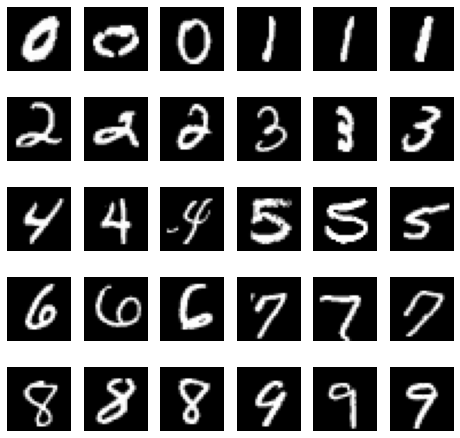

In [14]:
SampleImages()

- - -

(b) Implement a MLP architecture and write forward pass. You need to implement all
following layers, ReLU activation function, and softmax function. You should also
implement cross-entropy loss function.

(1) Architecture:\
[Layer 1] → Flatten layer that will flatten image 2D matrix into 1D vector.\
[Layer 2] → Dense layer (fully connected layer) with 128 hidden units, followed
by ReLU activation function.\
[Layer 3] → Dense layer (fully connected layer) with 128 hidden units, followed
by ReLU activation function.\
[Layer 4] → Output dense layer (fully connected layer) with 10 softmax outputs.

In [68]:
## sigmoid function
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x))

In [69]:
## Relu Function
def relu(x):
    return np.maximum(0,x)

In [70]:
## Softmax function
def softmax(x):
    ex = np.exp(x - np.max(x))
    return ex / ex.sum()

In [71]:
## cross-entropy loss function
def cross_entropy(y_pred, y):
    if y == 1:
        return -(np.log(y_pred))
    else:
        return -(np.log(1 - y_pred))

In [ ]:
## Relu activation function layer
class relu(layer):
    def __init__(self):
        pass
    def forward(self, input):
        relu_forward = np.maximum(0,input)
        return relu_forward
    def backward(self, input, grad_output):
        relu_grad = input >0
        return grad_output*relu_grad

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc=0.0, 
                                        scale = np.sqrt(2/(input_units+output_units)), 
                                        size = (input_units,output_units))
        self.biases = np.zeros(output_units)
        
        
    def forward(self,input):
        return np.dot(input,self.weights) + self.biases
    
    
    def backward(self,input,grad_output):
        grad_input = np.dot(grad_output, self.weights.T)
        

        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis=0)*input.shape[0]
        
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape
        
        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        
        return grad_input

[LAYER1] Flatten data 

In [72]:
t = train_data.reshape(train_data.shape[0], -1)

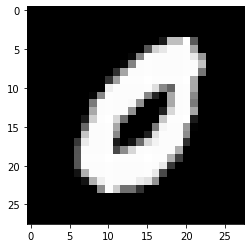

In [58]:
plt.imshow(t[0].reshape([28,28]),cmap='gray')

In [56]:
t.shape

(50000, 784)

- - -

(c) Implement backward pass to compute the gradients w.r.t the parameters. You should check the correctness of your implementation by either (1) using finite difference or (2) using the existing deep learning libraries. Please provide checking codes in the report .

* Check the values like MSE or finite difference

In [65]:
## Defining Mean Squared Error calculation
def mse_cal(y, y_pred):
    mse_y = np.square(np.subtract(y, y_pred)).mean()
    return mse_y

* Comparison - (2) Using the existing deep learning libraries - with pytorch

In [15]:
import torch
import torch.nn as nn 
import torch.nn.functional as F
import torch.nn.init as init 
import torchvision
from torchvision import transforms, datasets 
from torch.utils.data import DataLoader

In [104]:
#Setting torch environment

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using PyTorch version:', torch.__version__, ' Device: ', DEVICE)

Using PyTorch version: 1.7.1  Device:  cuda


In [85]:
class Args:
    # arugments
    epochs=20
    bs=32
    lr=0.001
    verbose='store_true'
    seed=710674

args = Args()

In [96]:
## train, test dataset and dataloader
train_dataset = datasets.MNIST(
    root="../data/MNIST",
    train=True,
    download=True,
    transform=transforms.ToTensor()
)
test_dataset = datasets.MNIST(
    root="../data/MNIST",
    train=False,
    download=True,
    transform=transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=100,
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=200,
    shuffle=False
)

In [97]:
train_data.shape

(50000, 28, 28)

In [98]:
class MLP_MNIST_torch(nn.Module):
    def __init__(self):
        super(MLP_MNIST_torch, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 128)
        self.layer2 = nn.Linear(128, 128)
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = F.relu(x)
        x = self.layer2(x)
        x = F.relu(x)
        x = self.layer3(x)
        x = F.log_softmax(x, dim=1)
        return x

In [105]:
model_MNIST = MLP_MNIST_torch()
model = model_MNIST.to(DEVICE)
print(model)

MLP_MNIST_torch(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=10, bias=True)
)


In [106]:
## loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [107]:
for images, labels in train_loader:
    print(images.size())
    break
print(images.view(100,-1).size())

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


In [111]:
## Model training

train_loss = []
train_correct = []
test_loss = []
test_correct = []

for i in range(args.epochs):
    train_c = 0
    test_c = 0
    
    for b, (xtrain, ytrain) in enumerate(train_loader):
        xtrain = xtrain.to(DEVICE)
        ytrain = ytrain.to(DEVICE)
        b+=1
        y_pred = model(xtrain.view(100,-1))
        loss = criterion(y_pred, ytrain)
        
        prediction = torch.max(y_pred.data, 1)[1]
        batch_idx = (prediction == ytrain).sum()
        train_c += batch_idx
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print(f"\n[EPOCH: {i:2}], \tTrain Loss: {loss.item():10.4f},\tTrain Accuracy: {train_c.item():0.3f}")
            
    train_loss.append(loss)
    train_correct.append(train_c)
    
    with torch.no_grad():
        for b, (xtest, ytest) in enumerate(test_loader):
            xtest = xtest.to(DEVICE)
            ytest = ytest.to(DEVICE)
            y_val = model(xtest.view(200, -1))
            prediction = torch.max(y_val.data, 1)[1]
            test_c += (prediction == ytest).sum()
    
    loss = criterion(y_val, ytest)
    test_loss.append(loss)
    test_correct.append(test_c)


[EPOCH:  0], 	Train Loss:     0.0005,	Train Accuracy: 100.000

[EPOCH:  0], 	Train Loss:     0.0003,	Train Accuracy: 396.000

[EPOCH:  0], 	Train Loss:     0.0007,	Train Accuracy: 496.000

[EPOCH:  0], 	Train Loss:     0.0024,	Train Accuracy: 1091.000

[EPOCH:  0], 	Train Loss:     0.0001,	Train Accuracy: 1289.000

[EPOCH:  0], 	Train Loss:     0.0065,	Train Accuracy: 1586.000

[EPOCH:  0], 	Train Loss:     0.0001,	Train Accuracy: 2179.000

[EPOCH:  0], 	Train Loss:     0.0005,	Train Accuracy: 2575.000

[EPOCH:  0], 	Train Loss:     0.0009,	Train Accuracy: 2871.000

[EPOCH:  0], 	Train Loss:     0.0008,	Train Accuracy: 3366.000

[EPOCH:  0], 	Train Loss:     0.0093,	Train Accuracy: 3466.000

[EPOCH:  0], 	Train Loss:     0.0037,	Train Accuracy: 3860.000

[EPOCH:  0], 	Train Loss:     0.0021,	Train Accuracy: 3960.000

[EPOCH:  0], 	Train Loss:     0.0006,	Train Accuracy: 4060.000

[EPOCH:  0], 	Train Loss:     0.0092,	Train Accuracy: 4160.000

[EPOCH:  0], 	Train Loss:     0.0019,	Trai

KeyboardInterrupt: 

- - -

(d) Implement a stochastic gradient descent (SGD) algorithm and train your model. Please provide training and validation loss curves in a single plot.

In [18]:
def sgd_mnist (x, y):
    lr = args.lr
    n_epochs = args.epochs
    batch = args.bs
    w = np.random.randn(1, 13)
    b = np.random.randn(1, 1)
    epoch =1
    
    while epoch <= n_epochs:
        temp = x.sample(bs)
        x_tr = temp.iloc[:, 0:13].values
        y_tr = temp.iloc[:, -1].values
        
        lw = w
        lb = b
        loss = 0
        y_pred = []
        sq_loss = []
        
        for i in range(batch):
            lw = (-2/batch * x_tr[i]) * (y_tr[i] - np.dot(x_tr[i], w.T) - b)
            lb = (-2/batch) * (y_tr[i] - np.dot(x_tr[i], w.T) -b)
            w = w - lr * lw
            b = b - lr*lb
            predicted = np.dot(x_tr[i], w.T)
            y_pred.append(predicted)
        
        loss = mean_squared_error(y_pred, y_tr)
        print("Epoch: %d, Loss: %.3f" %(epoch, loss))
        epoch += 1
        lr = lr/1.01
    return w, b

In [43]:
def predict(x, w, b):
    y_pred = []
    for i in range(len(x)):
        temp_ = x
        x_test = temp_.iloc[:, 0:13].values
        y = np.asscalar(np.dot(w, test_data[i]) + b)
        y_pred.append(y)
    return np.array(y_pred)

w, b = sgd_mnist(train_data, train_label)
y_pred_sgd = predict(test_data, w, b)

- - -

(e) Train with different hyperparameters. Try at least 5 different learning rates and minibatch sizes. Plot training and validation curves for all different configurations in a single plot.